In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
# crawling
def crawl_bugs():
    url = "https://music.bugs.co.kr/chart"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    songs = soup.select('table.byChart tbody tr')
    for idx, song in enumerate(songs, start=1):
        # rank_elem = song.select_one('div.ranking')
        title_elem = song.select_one('p.title')
        artist_elem = song.select_one('p.artist a')
        
        if title_elem and artist_elem:
            rank = str(idx)  # 순서대로 순위 매기기
            title = title_elem.get_text(strip=True)
            artist = artist_elem.get_text(strip=True)
            data.append(['벅스', rank, title, artist])

    return data

def crawl_genie():
    url = "https://www.genie.co.kr/chart/top200"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    songs = soup.select('table.list-wrap tbody tr')
    for idx, song in enumerate(songs, start=1):
        # rank_elem = song.select_one('td.number')
        title_elem = song.select_one('a.title.ellipsis')
        artist_elem = song.select_one('a.artist.ellipsis')
        
        if title_elem and artist_elem:
            rank = str(idx) 
            title = title_elem.get_text(strip=True)
            artist = artist_elem.get_text(strip=True)
            data.append(['지니', rank, title, artist])

    return data
def crawl_melon():
    url = "https://www.melon.com/chart/index.htm"
    headers = {
        "User-Agent": "Mozilla/5.0",
        "Referer": "https://www.melon.com/"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    songs = soup.select('tr[data-song-no]')
    for song in songs:
        rank_elem = song.select_one('span.rank')
        title_elem = song.select_one('div.ellipsis.rank01 span a')
        artist_elem = song.select_one('div.ellipsis.rank02 span a')
        
        if rank_elem and title_elem and artist_elem:
            rank = rank_elem.get_text(strip=True)
            title = title_elem.get_text(strip=True)
            artist = artist_elem.get_text(strip=True)
            data.append(['멜론', rank, title, artist])

    return data

bugs_data = crawl_bugs()
genie_data = crawl_genie()
melon_data = crawl_melon()

In [3]:
# check each crawled datas

In [4]:
bugs_data = pd.DataFrame(bugs_data, columns=['서비스', '순위', '타이틀', '가수'])
bugs_data.head(10)

,서비스,순위,타이틀,가수
0,벅스,1,REBEL HEART,IVE (아이브)
1,벅스,2,Whiplash,aespa
2,벅스,3,toxic till the end,로제(ROSÉ)
3,벅스,4,"HOME SWEET HOME (feat. 태양, 대성)",G-DRAGON
4,벅스,5,APT.,로제(ROSÉ)
5,벅스,6,Drowning,WOODZ
6,벅스,7,나는 반딧불,황가람
7,벅스,8,너와의 모든 지금,재쓰비 (JAESSBEE)
8,벅스,9,HAPPY,DAY6 (데이식스)
9,벅스,10,DRIP,BABYMONSTER


In [5]:
genie_data = pd.DataFrame(genie_data, columns=['서비스', '순위', '타이틀', '가수'])
genie_data.head(10)

,서비스,순위,타이틀,가수
0,지니,1,HOME SWEET HOME (Feat. 태양 & 대성),G-DRAGON
1,지니,2,Whiplash,aespa
2,지니,3,APT.,로제 (ROSÉ) & Bruno Mars
3,지니,4,REBEL HEART,IVE (아이브)
4,지니,5,나는 반딧불,황가람
5,지니,6,HAPPY,DAY6 (데이식스)
6,지니,7,toxic till the end,로제 (ROSÉ)
7,지니,8,Drowning,WOODZ
8,지니,9,너와의 모든 지금,재쓰비 (JAESSBEE)
9,지니,10,내게 사랑이 뭐냐고 물어본다면,로이킴


In [6]:
melon_data = pd.DataFrame(melon_data, columns=['서비스', '순위', '타이틀', '가수'])
melon_data.head(10)

,서비스,순위,타이틀,가수
0,멜론,1,"HOME SWEET HOME (feat. 태양, 대성)",G-DRAGON
1,멜론,2,Whiplash,aespa
2,멜론,3,APT.,로제 (ROSÉ)
3,멜론,4,나는 반딧불,황가람
4,멜론,5,REBEL HEART,IVE (아이브)
5,멜론,6,toxic till the end,로제 (ROSÉ)
6,멜론,7,Drowning,WOODZ
7,멜론,8,HAPPY,DAY6 (데이식스)
8,멜론,9,오늘만 I LOVE YOU,BOYNEXTDOOR
9,멜론,10,POWER,G-DRAGON


In [7]:
# merge all datas 
total = pd.concat([bugs_data, genie_data, melon_data], ignore_index=True)

In [8]:
total.to_excel('total.xlsx', index=False)

In [9]:
# explore datas

In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    object
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


In [11]:
total['순위'] = total['순위'].astype(int)
# total.info()

In [12]:
# 1. 아티스트가 차트에 얼마나 자주 등장하는지 분석 
artist_count = total['가수'].value_counts()
artist_analysis_df = artist_count.reset_index()
artist_analysis_df.columns = ['가수', '등장 횟수']

In [13]:
# 2. 각 서비스간의 겹치는 곡 비율 분석
overlapping_songs = total.groupby('타이틀')['서비스'].nunique()
# 겹치는 곡의 비율 계산
overlap_percentage = (overlapping_songs.value_counts() / len(overlapping_songs)) * 100

# 겹치는 곡만 선택(top3)
top_3_overlap = overlapping_songs[overlapping_songs > 1].head(3)

In [14]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int32 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int32(1), object(3)
memory usage: 7.0+ KB


In [30]:
# 3. 트렌드 아티스트 분석 
artist_count = total['가수'].value_counts()
top_trending_artists = artist_count.head(5)
trending_artists_df = top_trending_artists.reset_index()
trending_artists_df.columns = ['가수', '등장 횟수']

In [4]:
def display_analysis():
    print("\n--- 아티스트 등장 횟수 ---")
    print(artist_analysis_df.head(10))

    print("\n--- 서비스 간 겹치는 곡 비율 ---")
    print(overlap_analysis_df)
    print(f"\nOverlap Percentage:\n{overlap_percentage}")

    print("\n--- 트렌드 아티스트 분석 ---")
    print(trending_artists_df)

# display_analysis() #어떤 식으로 시각화할지 생각해보기 위한 출력 

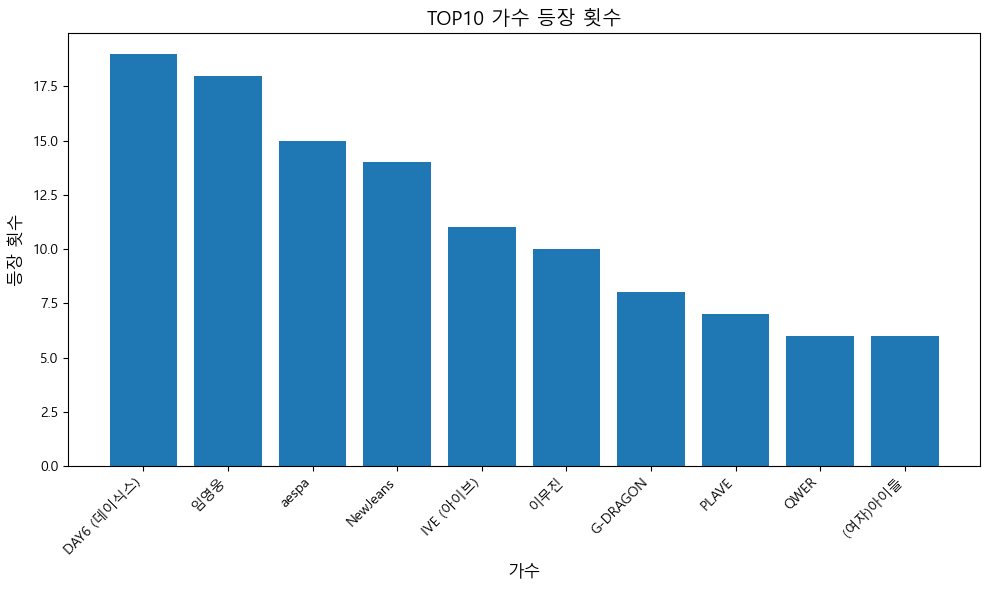

In [ ]:
# 1. Top10에서 어떤 가수가 많이 등장하는지 
plt.figure(figsize=(10, 6))
plt.bar(trending_artists_df['가수'], trending_artists_df['등장 횟수'])
plt.title('TOP10 가수 등장 횟수', fontsize=14)
plt.xlabel('가수', fontsize=12)
plt.ylabel('등장 횟수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

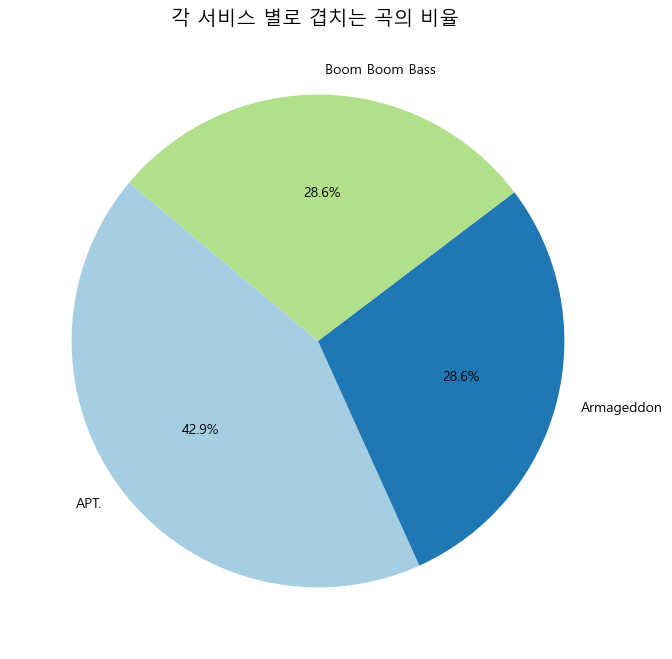

In [ ]:
# 2. 각 서비스 별로 겹치는 곡의 비율 (top3)
plt.figure(figsize=(12, 8))
plt.pie(
    top_3_overlap,
    labels=top_3_overlap.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('각 서비스 별로 겹치는 곡의 비율 ', fontsize=14)
plt.show()

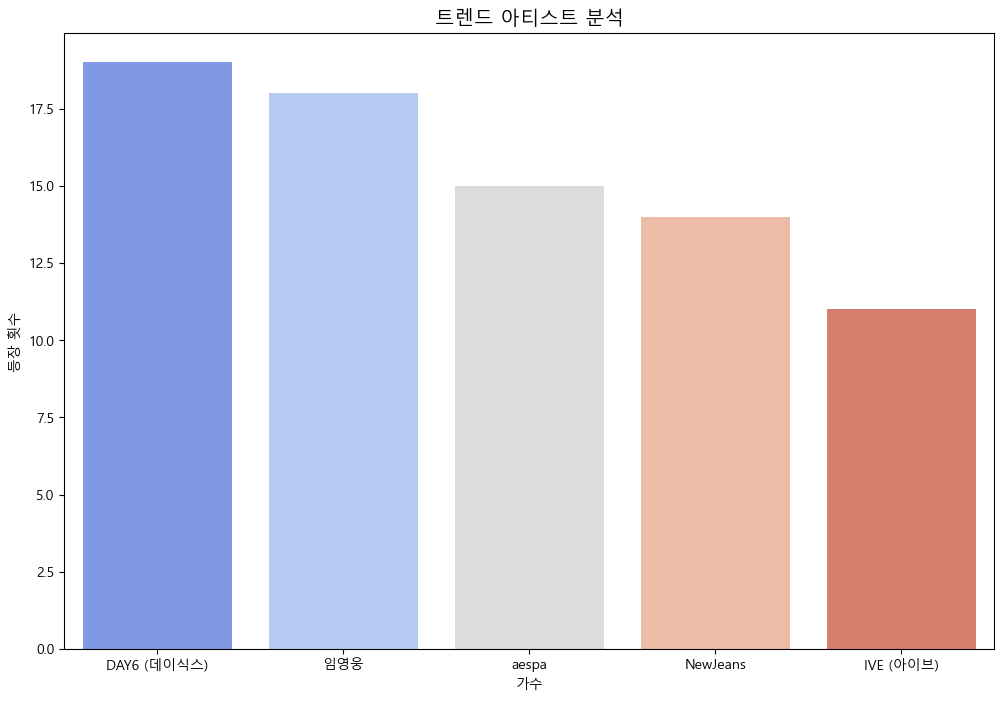

In [ ]:
# 3. 트렌드 아티스트 분석 
plt.figure(figsize=(12, 8))
sns.barplot(data=trending_artists_df, x='가수', y='등장 횟수', palette='coolwarm')
plt.title('트렌드 아티스트 분석', fontsize=14)
plt.ylabel('등장 횟수')
plt.xlabel('가수')
plt.show()

##### 1.23일 오후 2시 기준, 차트에서의 등장 횟수가 높을수록, 트렌디한 아티스트라고 가정 -> **데이식스, 임영웅, 에스파** 등이 **인기 있는 아티스트**로 분석됨. 
##### 각 서비스 별로 겹치는 노래를 확인해 봤을 때, **"1. APT(Rose)"** 의 비율이 압도적으로 높고, **"2. Armegeddon(에스파), 3. Boom Boom Bass(Riize)"** 또한 자주 등장하는 노래인 것 확인. 